In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans

In [2]:
# Especificar los tipos de datos para cada columna
dtype_dict = {
    "Country Name": str,
    "Country Code": str,
    "Indicator Name": str,
    "Indicator Code": str
}

# Leer el archivo CSV con los tipos de datos especificados
df = pd.read_csv("WDIData.csv", sep=",", decimal=",", dtype=dtype_dict)

# Convertir las columnas numéricas a tipo float
columnas_numericas = df.columns[4:]  # Seleccionar todas las columnas a partir de la quinta
df[columnas_numericas] = df[columnas_numericas].astype(float)

# Verificar el tipo de datos resultante
print(df.dtypes)

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2019              float64
2020              float64
2021              float64
2022              float64
Unnamed: 67       float64
Length: 68, dtype: object


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395276 entries, 0 to 395275
Data columns (total 68 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    395276 non-null  object 
 1   Country Code    395276 non-null  object 
 2   Indicator Name  395276 non-null  object 
 3   Indicator Code  395276 non-null  object 
 4   1960            38880 non-null   float64
 5   1961            44138 non-null   float64
 6   1962            45320 non-null   float64
 7   1963            46200 non-null   float64
 8   1964            46743 non-null   float64
 9   1965            48944 non-null   float64
 10  1966            48946 non-null   float64
 11  1967            49618 non-null   float64
 12  1968            50272 non-null   float64
 13  1969            51035 non-null   float64
 14  1970            68363 non-null   float64
 15  1971            75289 non-null   float64
 16  1972            77209 non-null   float64
 17  1973      

In [4]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156,20.279599,20.773627,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889,8.366010,8.684137,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848,39.894830,40.213891,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609,NaN,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.623956,16.516633,24.594474,25.389297,27.041743,29.138285,30.998687,32.772690,NaN,NaN


In [5]:
df.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1960              356396
                   ...  
2019              180011
2020              201157
2021              230860
2022              290503
Unnamed: 67       395276
Length: 68, dtype: int64

In [6]:
df.shape

(395276, 68)

In [7]:
# Eliminar columna que no necesitamos, la ultima
df.drop(df.columns[-1], axis=1, inplace=True)
df.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.914625,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156,20.279599,20.773627,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.473301,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889,8.366010,8.684137,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,37.870347,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848,39.894830,40.213891,NaN


In [8]:
#Intercambiar NA por -1
df.fillna(-1, inplace= True)
df.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,16.914625,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156,20.279599,20.773627,-1.0
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,6.473301,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889,8.366010,8.684137,-1.0
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,37.870347,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848,39.894830,40.213891,-1.0


In [9]:
# Calcular la proporción de valores -1 en cada columna numérica
proporcion_valores_negativos = (df.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']) == -1).mean()

# Definir un umbral para decidir si eliminar la columna
umbral = 0.5  # Por ejemplo, si más del 50% de los valores son -1, eliminaremos la columna

# Filtrar las columnas que superan el umbral
columnas_a_eliminar = proporcion_valores_negativos[proporcion_valores_negativos > umbral].index

# Eliminar las columnas del DataFrame original
df_filtrado = df.drop(columns=columnas_a_eliminar)

In [10]:
df_filtrado.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,12.990589,13.394404,13.835255,14.257120,14.687203,15.124112,15.545214,16.028677,16.447499,16.914625,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,4.312080,4.530435,4.759641,5.004145,5.237581,5.483481,5.733854,5.957514,6.224276,6.473301,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,34.220485,34.727444,35.159518,35.694984,36.102188,36.447583,36.849648,37.180314,37.540749,37.870347,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,23.749531,23.493013,25.191221,26.807937,25.943316,26.193895,27.400110,28.914348,31.666928,31.695183,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,10.910243,10.442796,12.518041,12.527150,12.986509,15.527791,14.462760,16.100904,19.375171,18.672306,17.623956,16.516633,24.594474,25.389297,27.041743,29.138285


In [11]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395276 entries, 0 to 395275
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    395276 non-null  object 
 1   Country Code    395276 non-null  object 
 2   Indicator Name  395276 non-null  object 
 3   Indicator Code  395276 non-null  object 
 4   2004            395276 non-null  float64
 5   2005            395276 non-null  float64
 6   2006            395276 non-null  float64
 7   2007            395276 non-null  float64
 8   2008            395276 non-null  float64
 9   2009            395276 non-null  float64
 10  2010            395276 non-null  float64
 11  2011            395276 non-null  float64
 12  2012            395276 non-null  float64
 13  2013            395276 non-null  float64
 14  2014            395276 non-null  float64
 15  2015            395276 non-null  float64
 16  2016            395276 non-null  float64
 17  2017      

In [12]:
paises_latinoamerica = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela']

children_out_of_school = df_filtrado.loc[(df_filtrado['Country Name'].isin(paises_latinoamerica)) & (df_filtrado['Indicator Name'] == 'Children out of school, primary')].copy()
employment_to_population_ratio = df_filtrado.loc[(df_filtrado['Country Name'].isin(paises_latinoamerica)) & (df_filtrado['Indicator Name'] == 'Employment to population ratio, ages 15-24, total (%) (national estimate)')].copy()
labor_force_with_basic_education = df_filtrado.loc[(df_filtrado['Country Name'].isin(paises_latinoamerica)) & (df_filtrado['Indicator Name'] == 'Labor force with basic education (% of total working-age population with basic education)')].copy()

# Visualizar el subgrupo
labor_force_with_basic_education

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
83905,Argentina,ARG,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,55.899,54.801,54.220,-1.000,52.211,51.913,51.244,51.477,50.865,49.782,49.827,-1.000,-1.000,48.495,48.458,48.750
107681,Bolivia,BOL,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,79.281,60.568,64.045,63.339,63.633,63.993,-1.000,66.674,59.246,61.999,65.999,60.833,61.091,62.655,67.708,69.830
112139,Brazil,BRA,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,67.345,67.667,67.187,66.302,65.606,65.597,-1.000,62.303,70.331,69.894,69.380,64.638,50.280,50.224,49.697,49.138
132943,Chile,CHL,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,-1.000,-1.000,47.885,-1.000,-1.000,45.344,49.258,50.396,49.669,49.349,49.674,49.055,48.321,48.448,47.693,46.912
135915,Colombia,COL,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,60.380,59.725,-1.000,58.997,59.122,62.248,62.514,62.504,62.996,61.498,60.942,60.592,59.528,59.178,57.874,56.539
141859,Costa Rica,CRI,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,56.724,59.520,58.738,59.350,60.323,59.919,56.830,57.908,62.352,61.112,61.323,60.858,56.695,57.386,60.369,61.115
146317,Cuba,CUB,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,-1.000,-1.000,-1.000,-1.000,-1.000,37.180,35.660,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000
156719,Dominican Republic,DOM,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,53.685,53.320,53.718,54.203,52.889,51.152,52.680,54.022,54.516,54.155,55.046,58.184,58.023,57.518,58.867,59.478
158205,Ecuador,ECU,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,66.251,65.675,67.200,63.346,63.252,60.223,58.986,57.095,57.638,57.607,57.762,61.044,63.111,63.635,62.074,61.371
161177,El Salvador,SLV,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,59.765,60.283,60.864,60.385,59.857,58.850,59.353,59.177,58.313,59.884


In [13]:
columnas_a_eliminar = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']

In [14]:
children_out_of_school_variables = children_out_of_school.drop(columns=columnas_a_eliminar)
children_out_of_school_variables.describe()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,18.000000,18.000000,18.0000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,31630.555556,34520.944444,32366.0000,33538.111111,35232.166667,24812.944444,26125.888889,27653.611111,87226.388889,56095.555556,81767.388889,90659.833333,99776.388889,94897.277778,93981.555556,87098.555556
std,55185.357490,55035.939479,49403.0913,49169.701231,47615.800512,44064.875563,43804.889712,44485.749040,209916.184529,142434.753144,151102.370698,162410.080312,157341.749809,153435.661757,172174.394512,151469.686472
min,-1.000000,-1.000000,-1.0000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,1122.000000,1812.5000,3331.500000,2982.000000,-1.000000,687.750000,2092.250000,4717.500000,-1.000000,3383.500000,5461.250000,18525.250000,5407.000000,111.500000,4369.250000
50%,5322.500000,8819.500000,9529.5000,15041.000000,14644.000000,10716.500000,11598.500000,15004.500000,20148.500000,9268.500000,27655.500000,38172.500000,39244.500000,32578.500000,25187.500000,26317.500000
75%,34602.250000,35260.250000,26800.5000,45631.750000,46440.000000,23143.500000,23984.750000,27609.500000,63532.250000,34077.750000,46518.500000,52176.000000,88836.750000,126920.500000,119569.250000,59118.000000
max,170852.000000,160655.000000,170671.0000,188207.000000,157861.000000,183896.000000,182475.000000,187502.000000,896213.000000,602121.000000,600337.000000,658888.000000,630849.000000,619485.000000,709047.000000,612571.000000


In [15]:
employment_to_population_ratio_variables = employment_to_population_ratio.drop(columns=columnas_a_eliminar)
employment_to_population_ratio_variables.describe()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,28.880056,31.088000,29.576333,27.098667,31.902278,33.664000,32.830278,38.241389,42.307278,37.881444,40.248000,34.942278,34.472056,36.295278,36.648833,36.334611
std,23.219529,21.686454,23.435819,24.075678,22.265070,20.731702,20.050106,16.223698,14.188031,15.896582,12.584025,17.557612,17.445819,15.327454,15.604894,15.851192
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,6.178250,-1.000000,-1.000000,6.789250,29.408500,31.217000,34.271750,37.851750,34.820000,36.560500,35.935250,34.473500,34.469750,34.543500,32.040250
50%,35.811500,39.071000,37.504500,37.172000,39.672000,41.029500,40.210500,41.869000,43.070500,42.143500,41.929000,40.105500,40.371500,40.111500,39.834000,39.309000
75%,47.102250,47.233500,49.166000,45.838500,46.543750,46.406750,42.618750,48.407750,47.252500,46.160250,47.381750,43.845250,41.480000,41.814750,45.112750,47.445750
max,62.349000,57.665000,61.307000,62.711000,63.434000,63.801000,64.450000,63.051000,64.812000,61.262000,59.418000,56.574000,55.658000,57.107000,56.961000,57.652000


In [16]:
labor_force_with_basic_education_variables = labor_force_with_basic_education.drop(columns=columnas_a_eliminar)
labor_force_with_basic_education_variables.describe()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,42.340722,43.849833,47.090444,41.000833,43.943667,48.587167,48.005833,53.294889,58.327222,53.474056,57.337056,50.394333,49.667389,52.498833,49.198667,49.217611
std,32.210293,29.001727,27.160322,30.953129,29.145806,24.354284,23.977985,20.689774,16.653387,20.773281,15.809318,24.125129,23.997499,20.479943,24.002014,24.043282
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,12.580000,49.343250,-1.000000,12.302750,46.796000,49.754500,54.094250,55.932500,54.694250,56.695250,56.037500,51.664000,51.397000,48.767750,48.847000
50%,56.942000,58.402500,57.784000,57.415000,58.813500,58.282000,57.456500,57.981500,60.055000,59.544000,60.869000,60.608000,58.688000,58.347500,58.093500,58.802500
75%,67.071500,60.357250,64.951000,63.344250,62.853500,62.513500,60.866000,62.813750,66.394000,61.873750,63.051250,61.380750,61.906750,63.051000,61.845500,61.307000
max,79.281000,72.416000,75.085000,76.267000,76.247000,76.534000,77.359000,76.569000,76.364000,75.463000,74.820000,73.843000,74.629000,74.765000,74.357000,74.076000


In [17]:
# Convertir todas las columnas a numéricas y manejar los valores no numéricos como NaN
children_out_of_school_variables = children_out_of_school_variables.apply(pd.to_numeric, errors='coerce')
# Normalizar los datos
children_out_of_school_norm = (children_out_of_school_variables - children_out_of_school_variables.min()) / (children_out_of_school_variables.max() - children_out_of_school_variables.min())
# Mostrar el resultado de la normalización
children_out_of_school_norm

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
83396,0.028674,0.074607,0.110891,0.127657,0.132622,0.108066,0.015098,0.026074,0.006773,0.026322,0.054216,0.055832,0.034628,0.040145,0.038796,0.043632
107172,0.049306,0.037266,0.027280,0.017252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
111630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
132434,0.000000,0.000000,0.000000,0.280727,0.317854,0.398919,0.273269,0.281734,0.055102,0.080344,0.071015,0.060040,0.057819,0.055528,0.040717,0.040255
135406,0.104013,0.086782,0.043077,0.019069,0.053198,0.051306,0.060457,0.023109,0.076154,0.000000,0.000000,0.199946,0.319100,0.252616,0.255159,0.316650
141350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008581,0.007499,0.022387,0.037920,0.039773,0.039659,0.049654,0.023509,0.021333
145808,0.029751,0.044947,0.066185,0.028835,0.085302,0.055357,0.073615,0.107881,0.019566,0.008402,0.028815,0.030509,0.030985,0.034816,0.029709,0.031557
156210,1.000000,0.975513,1.000000,0.520026,0.896213,0.265350,0.297606,0.298982,0.078660,0.121308,0.156215,0.079513,0.084710,0.099720,0.092837,0.074775
157696,0.000000,0.292955,0.159370,0.075528,0.223189,0.082639,0.066677,0.077140,0.022981,0.030469,0.030008,0.025402,0.028828,0.031457,0.032253,0.042295
160668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.079647,0.078220,0.088917,0.000000,0.000000,0.000000


In [18]:
employment_to_population_ratio_variables = employment_to_population_ratio_variables.apply(pd.to_numeric, errors='coerce')
employment_to_population_ratio_norm = (employment_to_population_ratio_variables - employment_to_population_ratio_variables.min()) / (employment_to_population_ratio_variables.max() - employment_to_population_ratio_variables.min())
employment_to_population_ratio_norm

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
83602,0.543213,0.587727,0.573595,0.000000,0.551526,0.531087,0.521115,0.534793,0.518355,0.534997,0.535089,0.000000,0.000000,0.535839,0.535809,0.510093
107378,0.000000,0.777926,0.820807,0.000000,0.763122,0.757751,0.000000,0.793586,0.673768,0.715011,0.827038,0.729618,0.733736,0.732321,0.814185,0.867984
111836,0.836493,0.908395,0.852360,0.840373,0.836794,0.803954,0.000000,0.790511,0.745791,0.774357,0.787878,0.786727,0.733842,0.707109,0.716275,0.726966
132640,0.449826,0.489440,0.472836,0.470609,0.483549,0.452184,0.482613,0.511061,0.488437,0.505637,0.515194,0.542936,0.533164,0.505120,0.493487,0.451596
135612,0.653270,0.708583,0.000000,0.611747,0.594500,0.630546,0.625546,0.662972,0.665517,0.695689,0.713910,0.755480,0.739754,0.707918,0.685909,0.649373
141556,0.660721,0.725918,0.699793,0.736137,0.693593,0.615484,0.581620,0.547423,0.583450,0.619688,0.623837,0.636694,0.609870,0.600909,0.608513,0.549683
146014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
156416,0.589228,0.622910,0.603784,0.586539,0.598271,0.520486,0.540856,0.560460,0.547545,0.560518,0.602122,0.656025,0.674786,0.666322,0.672452,0.667513
157902,0.780344,0.840416,0.818303,0.757546,0.730546,0.677891,0.633751,0.607937,0.611028,0.620250,0.620957,0.694723,0.726658,0.729946,0.715999,0.700880
160874,0.000000,0.000000,0.000000,0.000000,0.000000,0.685175,0.666860,0.697054,0.684298,0.713180,0.707157,0.740664,0.753098,0.738328,0.739773,0.743265


In [19]:
labor_force_with_basic_education_variables = labor_force_with_basic_education_variables.apply(pd.to_numeric, errors='coerce')
labor_force_with_basic_education_norm = (labor_force_with_basic_education_variables - labor_force_with_basic_education_variables.min()) / (labor_force_with_basic_education_variables.max() - labor_force_with_basic_education_variables.min())
labor_force_with_basic_education_norm

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
83905,0.708748,0.760066,0.725767,0.000000,0.688842,0.682449,0.666726,0.676520,0.670402,0.664138,0.670364,0.000000,0.000000,0.653270,0.656316,0.662662
107681,1.000000,0.838618,0.854899,0.832684,0.836706,0.838252,0.000000,0.872436,0.778734,0.823915,0.883659,0.826169,0.820995,0.840164,0.911767,0.943444
112139,0.851322,0.935314,0.896195,0.871032,0.862247,0.858939,0.000000,0.816086,0.922018,0.927167,0.928251,0.877009,0.678047,0.676091,0.672758,0.667830
132943,0.000000,0.000000,0.642505,0.000000,0.000000,0.597725,0.641381,0.662584,0.654943,0.658475,0.668346,0.668800,0.652144,0.652650,0.646164,0.638180
135915,0.764564,0.827136,0.000000,0.776489,0.778309,0.815745,0.810551,0.818678,0.827206,0.817363,0.816961,0.822949,0.800328,0.794272,0.781268,0.766410
141859,0.719024,0.824343,0.785148,0.781058,0.793856,0.785707,0.738014,0.759427,0.818882,0.812314,0.821986,0.826503,0.762869,0.770620,0.814377,0.827362
146317,0.000000,0.000000,0.000000,0.000000,0.000000,0.492429,0.467847,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
156719,0.681170,0.739893,0.719169,0.714445,0.697619,0.672634,0.685052,0.709330,0.717595,0.721329,0.739198,0.790775,0.780428,0.772362,0.794445,0.805557
158205,0.837695,0.908181,0.896366,0.832775,0.831773,0.789628,0.765528,0.748946,0.757949,0.766475,0.775020,0.828989,0.847704,0.853098,0.837003,0.830771
161177,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.775469,0.790045,0.799648,0.802807,0.802651,0.799674,0.798014,0.794259,0.787093,0.810965


In [20]:
wscc1 = [] #Within cluster sum of squares 

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(children_out_of_school_norm) #Aplicamos KMeans a los datos
    wscc1.append(kmeans.inertia_)

C:\Users\eunic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\eunic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eunic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\eunic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Text(0, 0.5, 'WSCC')

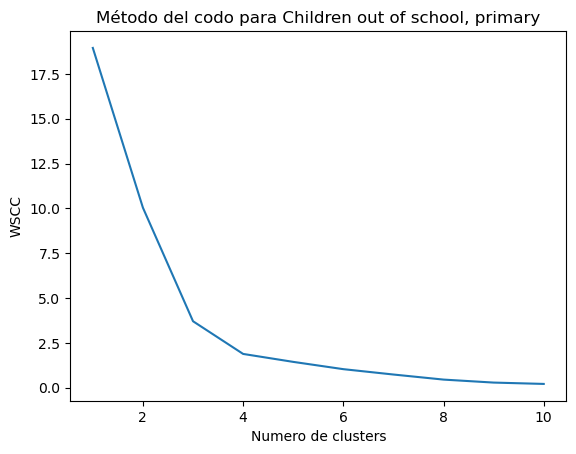

In [21]:
plt.plot(range(1,11), wscc1)
plt.title("Método del codo para Children out of school, primary")
plt.xlabel("Numero de clusters")
plt.ylabel("WSCC") #WSCC es un indicador de que tan similares son los individuos

In [22]:
wscc2 = [] #Within cluster sum of squares 

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(employment_to_population_ratio_norm) #Aplicamos KMeans a los datos
    wscc2.append(kmeans.inertia_)

C:\Users\eunic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\eunic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eunic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\eunic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Text(0, 0.5, 'WSCC')

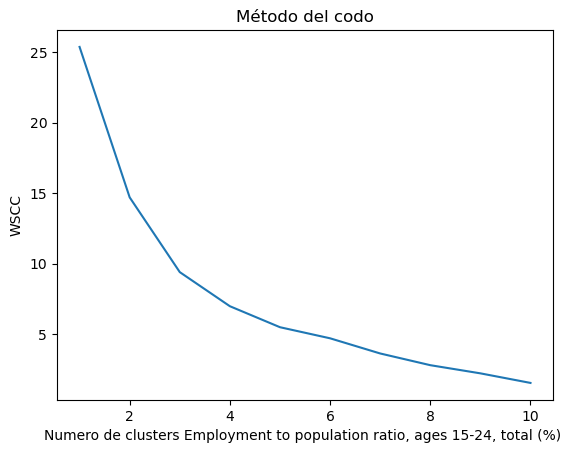

In [23]:
plt.plot(range(1,11), wscc2)
plt.title("Método del codo")
plt.xlabel("Numero de clusters Employment to population ratio, ages 15-24, total (%) ")
plt.ylabel("WSCC") #WSCC es un indicador de que tan similares son los individuos

In [24]:
wscc3 = [] #Within cluster sum of squares 

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(labor_force_with_basic_education_norm) #Aplicamos KMeans a los datos
    wscc3.append(kmeans.inertia_)

C:\Users\eunic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\eunic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eunic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\eunic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Text(0, 0.5, 'WSCC')

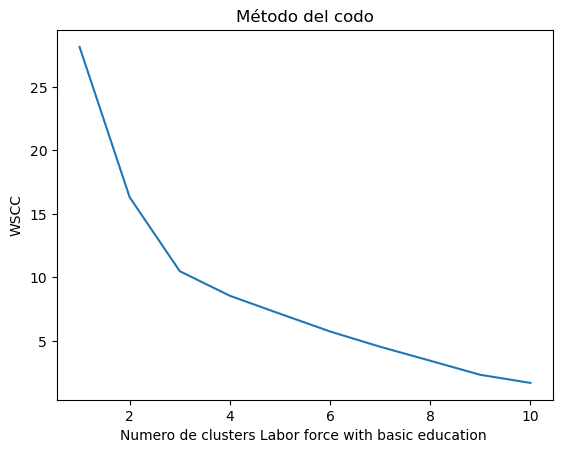

In [25]:
plt.plot(range(1,11), wscc3)
plt.title("Método del codo")
plt.xlabel("Numero de clusters Labor force with basic education ")
plt.ylabel("WSCC") #WSCC es un indicador de que tan similares son los individuos

In [26]:
clustering1 = KMeans(n_clusters = 3, max_iter = 300) #Creamos el modelo
clustering1.fit(children_out_of_school_norm) #Aplica el modelo a los datos

C:\Users\eunic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\eunic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [27]:
clustering2 = KMeans(n_clusters = 3, max_iter = 300) #Creamos el modelo
clustering2.fit(employment_to_population_ratio_norm) #Aplica el modelo a los datos

C:\Users\eunic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\eunic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [28]:
clustering3 = KMeans(n_clusters = 3, max_iter = 300) #Creamos el modelo
clustering3.fit(labor_force_with_basic_education_norm) #Aplica el modelo a los datos

C:\Users\eunic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\eunic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [29]:
children_out_of_school['KMeans_Cluster'] = clustering1.labels_ 
#Los resultados del clustering se guardan en labels_ dentro del modelo

children_out_of_school.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,KMeans_Cluster
83396,Argentina,ARG,"Children out of school, primary",SE.PRM.UNER,4898.0,11985.0,18925.0,24025.0,20935.0,19872.0,...,4888.0,6069.0,15848.0,32547.0,36786.0,21844.0,24868.0,27507.0,26727.0,0
107172,Bolivia,BOL,"Children out of school, primary",SE.PRM.UNER,8423.0,5986.0,4655.0,3246.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
111630,Brazil,BRA,"Children out of school, primary",SE.PRM.UNER,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,896213.0,602121.0,600337.0,658888.0,630849.0,619485.0,709047.0,612571.0,2
132434,Chile,CHL,"Children out of school, primary",SE.PRM.UNER,-1.0,-1.0,-1.0,52834.0,50176.0,73359.0,...,52825.0,49382.0,48376.0,42632.0,39559.0,36474.0,34398.0,28869.0,24658.0,0
135406,Colombia,COL,"Children out of school, primary",SE.PRM.UNER,17770.0,13941.0,7351.0,3588.0,8397.0,9434.0,...,4332.0,68249.0,-1.0,-1.0,131741.0,201303.0,156491.0,180919.0,193970.0,0


In [30]:
employment_to_population_ratio['KMeans_Cluster'] = clustering2.labels_ 
#Los resultados del clustering se guardan en labels_ dentro del modelo

employment_to_population_ratio.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,KMeans_Cluster
83602,Argentina,ARG,"Employment to population ratio, ages 15-24, to...",SL.EMP.1524.SP.NE.ZS,33.412,33.479,34.739,-1.000,34.537,33.415,...,33.254,33.114,32.310,31.329,-1.000,-1.000,30.136,30.056,28.918,0
107378,Bolivia,BOL,"Employment to population ratio, ages 15-24, to...",SL.EMP.1524.SP.NE.ZS,-1.000,44.637,50.142,-1.000,48.171,48.103,...,49.830,43.342,43.518,48.968,41.007,40.572,41.553,46.191,49.909,0
111836,Brazil,BRA,"Employment to population ratio, ages 15-24, to...",SL.EMP.1524.SP.NE.ZS,51.991,52.291,52.108,52.541,52.918,51.097,...,49.633,48.082,47.213,46.602,44.295,40.578,40.088,40.516,41.638,0
132640,Chile,CHL,"Employment to population ratio, ages 15-24, to...",SL.EMP.1524.SP.NE.ZS,27.496,27.713,28.461,28.983,30.157,28.302,...,31.734,31.145,30.482,30.127,30.259,29.208,28.351,27.603,25.487,0
135612,Colombia,COL,"Employment to population ratio, ages 15-24, to...",SL.EMP.1524.SP.NE.ZS,40.384,40.569,-1.000,37.975,37.306,39.860,...,41.464,42.799,42.315,42.133,42.496,40.913,40.135,38.756,37.087,0


In [31]:
labor_force_with_basic_education['KMeans_Cluster'] = clustering3.labels_ 
#Los resultados del clustering se guardan en labels_ dentro del modelo

labor_force_with_basic_education.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,KMeans_Cluster
83905,Argentina,ARG,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,55.899,54.801,54.220,-1.000,52.211,51.913,...,51.477,50.865,49.782,49.827,-1.000,-1.000,48.495,48.458,48.750,0
107681,Bolivia,BOL,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,79.281,60.568,64.045,63.339,63.633,63.993,...,66.674,59.246,61.999,65.999,60.833,61.091,62.655,67.708,69.830,2
112139,Brazil,BRA,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,67.345,67.667,67.187,66.302,65.606,65.597,...,62.303,70.331,69.894,69.380,64.638,50.280,50.224,49.697,49.138,2
132943,Chile,CHL,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,-1.000,-1.000,47.885,-1.000,-1.000,45.344,...,50.396,49.669,49.349,49.674,49.055,48.321,48.448,47.693,46.912,0
135915,Colombia,COL,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,60.380,59.725,-1.000,58.997,59.122,62.248,...,62.504,62.996,61.498,60.942,60.592,59.528,59.178,57.874,56.539,2


In [34]:
from sklearn.decomposition import PCA



pca = PCA(n_components = 2) #Grafico de dos dimensiones
pca_children_out_of_school = pca.fit_transform(children_out_of_school_norm) #Obtenemos los componentes principales
pca_children_out_of_school_df = pd.DataFrame(data = pca_children_out_of_school, columns = ["Componente_1", "Componente_2"])
pca_nombres_children_out_of_school = pd.concat([pca_children_out_of_school_df, children_out_of_school[['KMeans_Cluster']]], axis = 1)
#Asignamos colores a los puntos en base al cluster al que pertenecen

children_out_of_school.reset_index(drop=True, inplace=True)
pca_nombres_children_out_of_school.reset_index(drop=True, inplace=True)
# Concatenar los DataFrames
result = pd.concat([pca_nombres_children_out_of_school, children_out_of_school[['KMeans_Cluster']]], axis=1)

pca_nombres_children_out_of_school



,Componente_1,Componente_2,KMeans_Cluster
0,-0.382841,-0.075065,0
1,-0.584416,-0.070912,0
2,0.871328,2.350601,2
3,-0.142337,-0.160724,0
4,-0.216945,0.298552,0
5,-0.579594,0.026916,0
6,-0.448002,-0.067902,0
7,1.193508,-0.868448,1
8,-0.271675,-0.169082,0
9,-0.576843,0.027671,0


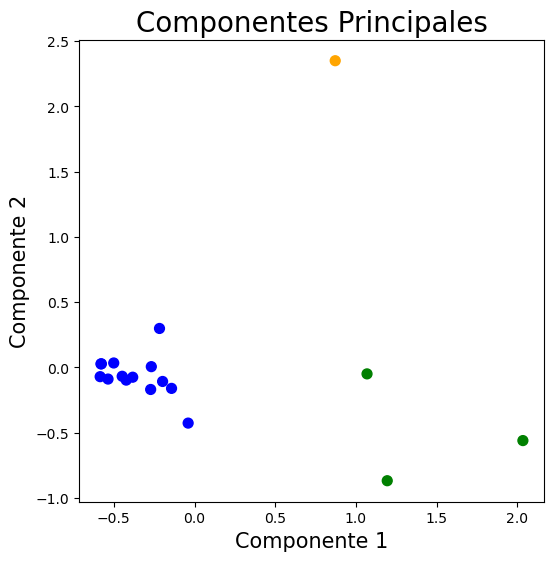

In [35]:
fig = plt.figure(figsize = (6,6)) #Creamos figura de tamaño 6x6

ax = fig.add_subplot(1,1,1) #Le indico que solo creare un grafico en la figura
ax.set_xlabel("Componente 1", fontsize = 15)
ax.set_ylabel("Componente 2", fontsize = 15)
ax.set_title("Componentes Principales", fontsize = 20)

color_theme = np.array(['blue', 'green', 'orange'])

ax.scatter(x = pca_nombres_children_out_of_school.Componente_1, y = pca_nombres_children_out_of_school.Componente_2,
          c = color_theme[pca_nombres_children_out_of_school.KMeans_Cluster], s=50)

In [38]:
pca = PCA(n_components=2)  # Grafico de dos dimensiones
pca_employment_to_population_ratio = pca.fit_transform(employment_to_population_ratio_norm)  # Obtenemos los componentes principales
pca_employment_to_population_ratio_df = pd.DataFrame(data=pca_employment_to_population_ratio, columns=["Componente_1", "Componente_2"])
pca_nombres_employment_to_population_ratio = pd.concat([pca_employment_to_population_ratio_df, employment_to_population_ratio[['KMeans_Cluster']]], axis=1)
# Asignamos colores a los puntos en base al cluster al que pertenecen

employment_to_population_ratio.reset_index(drop=True, inplace=True)
pca_nombres_employment_to_population_ratio.reset_index(drop=True, inplace=True)
# Concatenar los DataFrames
result2 = pd.concat([pca_nombres_employment_to_population_ratio, employment_to_population_ratio[['KMeans_Cluster']]], axis=1)

pca_nombres_employment_to_population_ratio



,Componente_1,Componente_2,KMeans_Cluster
0,0.547854,-0.451441,0
1,-0.216630,-0.051897,0
2,-0.743198,-0.485471,0
3,0.307764,-0.216660,0
4,-0.198820,0.169307,0
5,-0.277568,-0.370541,0
6,2.208655,-0.569510,2
7,-0.151256,-0.150349,0
8,-0.579496,-0.327537,0
9,0.487270,0.908163,1


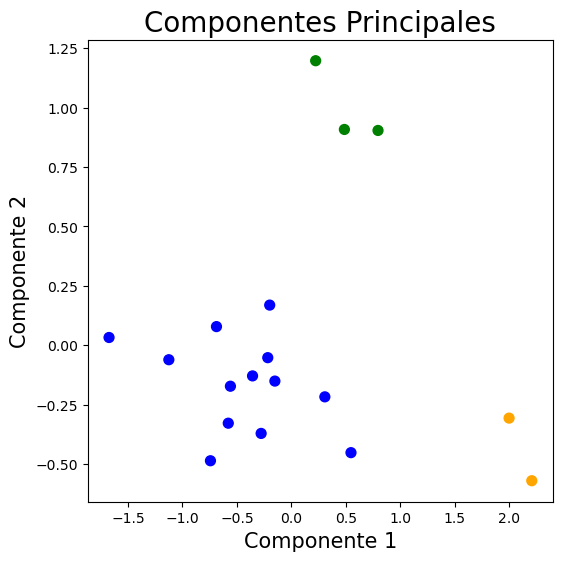

In [39]:
fig = plt.figure(figsize = (6,6)) #Creamos figura de tamaño 6x6

ax = fig.add_subplot(1,1,1) #Le indico que solo creare un grafico en la figura
ax.set_xlabel("Componente 1", fontsize = 15)
ax.set_ylabel("Componente 2", fontsize = 15)
ax.set_title("Componentes Principales", fontsize = 20)

color_theme = np.array(['blue', 'green', 'orange'])

ax.scatter(x = pca_nombres_employment_to_population_ratio.Componente_1, y = pca_nombres_employment_to_population_ratio.Componente_2,
          c = color_theme[pca_nombres_employment_to_population_ratio.KMeans_Cluster], s=50)

In [42]:
# Aplicar PCA
pca = PCA(n_components=2)
pca_labor_force_with_basic_education = pca.fit_transform(labor_force_with_basic_education_norm)

# Crear DataFrame para los componentes principales
pca_labor_force_with_basic_education_df = pd.DataFrame(data=pca_labor_force_with_basic_education, columns=["Componente_1", "Componente_2"])

# Concatenar DataFrame con los clusters
pca_nombres_labor_force_with_basic_education = pd.concat([pca_labor_force_with_basic_education_df, labor_force_with_basic_education[['KMeans_Cluster']]], axis=1)

# Restablecer índices
labor_force_with_basic_education.reset_index(drop=True, inplace=True)
pca_nombres_labor_force_with_basic_education.reset_index(drop=True, inplace=True)

# Concatenar los DataFrames
result3 = pd.concat([pca_nombres_labor_force_with_basic_education, labor_force_with_basic_education[['KMeans_Cluster']]], axis=1)

pca_nombres_labor_force_with_basic_education

,Componente_1,Componente_2,KMeans_Cluster
0,0.461323,-0.366121,0
1,-0.740180,-0.282440,2
2,-0.610568,-0.526573,2
3,0.784659,0.705998,0
4,-0.366766,-0.077190,2
5,-0.551267,-0.088896,2
6,2.329664,-0.384879,1
7,-0.339779,-0.021031,2
8,-0.693242,-0.144707,2
9,0.797403,1.134187,0


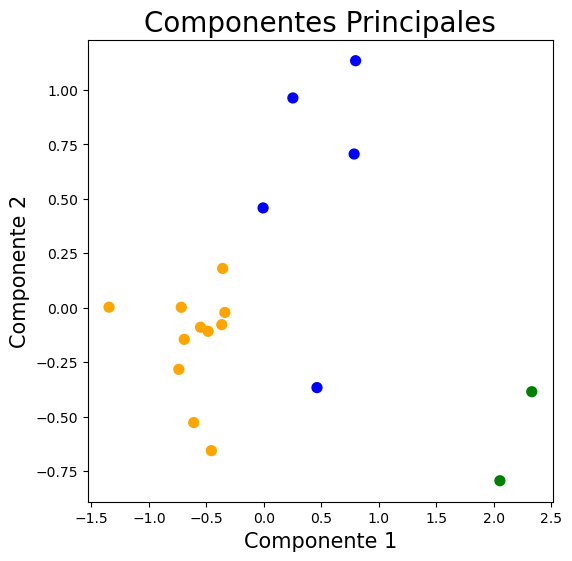

In [43]:
fig = plt.figure(figsize = (6,6)) #Creamos figura de tamaño 6x6

ax = fig.add_subplot(1,1,1) #Le indico que solo creare un grafico en la figura
ax.set_xlabel("Componente 1", fontsize = 15)
ax.set_ylabel("Componente 2", fontsize = 15)
ax.set_title("Componentes Principales", fontsize = 20)

color_theme = np.array(['blue', 'green', 'orange'])

ax.scatter(x = pca_nombres_labor_force_with_basic_education.Componente_1, y = pca_nombres_labor_force_with_basic_education.Componente_2,
          c = color_theme[pca_nombres_labor_force_with_basic_education.KMeans_Cluster], s=50)

In [47]:
children_out_of_school.to_csv("childrenOutOfSchoolCluster.csv")

In [48]:
employment_to_population_ratio.to_csv("employmentToPopulationRatioCluster.csv")

In [49]:
labor_force_with_basic_education.to_csv("laborForceWithBasicEducationCluster.csv")